In [1]:
import torch

device = torch.device("cpu")

In [3]:
from train import Hyperparameters

flow = torch.load('/Users/tommy/Documents/yin/celeba/bs64_normal_bd64_rb2_bn0_sk1_wn1_cb1_af1.model', 
           map_location=torch.device('cpu'))
flow = flow.eval()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tommy/Documents/yin/celeba/bs64_normal_bd64_rb2_bn0_sk1_wn1_cb1_af1.model'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


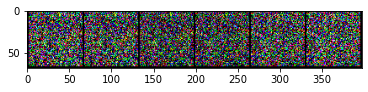

In [40]:
import data_utils

size = 2
C = flow.datainfo.channel
H = W = flow.datainfo.size
z = flow.prior.sample((size, C, H, W))

start = z[0]
end = z[1]

output = [start]
size = 4
for i in range(size):
    output.append(torch.lerp(start, end, (i + 0.5) / size))
output.append(end)

z = torch.stack(output)

grid = utils.make_grid(z)
canvas = grid.permute((1, 2, 0)).numpy()
plt.imshow(canvas)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


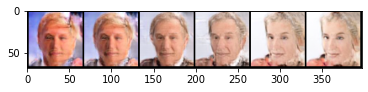

In [41]:
import torchvision.utils as utils
import matplotlib.pyplot as plt

samples = flow.g(z)    
samples, _ = data_utils.logit_transform(samples, reverse=True)

grid = utils.make_grid(samples)

canvas = grid.permute((1, 2, 0)).numpy()
plt.imshow(canvas)